In [1]:
import pandas as pd

In [176]:
#Imports for entire project up here
import pandas as pd    #formatting data and helpful analysis functions
import numpy as np    #helpful analysis functions
import matplotlib.pyplot as plt    #Plotting functionality for visualization and alaysis 
import yaml    #Need for parsing ratings column in step 2
from sklearn.linear_model import LinearRegression    #Useful ML library
from sklearn.model_selection import train_test_split    #To split data during ML 
from scipy import stats    #Useful for plotting regression lines

# Step 1: Data Collection
### Dataset
We used the ted talk data set from kaggle.com, a popular data science resource for both beginners and experts. The data set is very extensive and proives both valuable and irrelevant data for our project. Essentially, the data set has metrics on every ted talk regarding the date, the amount of views, word maps of review buzzwords, and other data that we will use later on. <br><br>
We obtained the data by downloading a CSV file and using the Pandas function for reading a comma separated value file (CSV). Pandas provides a tested and trusted function to do this, so trying to make our own would be foolish. The CSV file is in the same directory as this notebook, which is why the path we specifiy to read it in is just the file name itself. <br><br>
In the next step after thise, we will clean the data so it can be used for analysis, machine learning, and easy plotting. 

### Related links
Kaggle data source: https://www.kaggle.com/rounakbanik/ted-talks <br>
Reading in CSV files with Pandas: https://www.datacamp.com/community/tutorials/pandas-read-csv

In [86]:
#Step 1: Data Collection
#use pd.read_csv to read in the "dirty" data into a dataframe. We will clean this data in the next step.
ted_df = pd.read_csv("ted_main.csv")
#display the head of the dataframe for easy viewing and a quick look at the un-clean data
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [87]:
#Step 2: Data Processing
#in this step we will clean the data so that it can be used in later on steps
#drop description
ted_df = ted_df.drop(['description'], axis=1)
#drop event
ted_df = ted_df.drop(['event'], axis=1)
#change film_date from unix time to yyyy-mm-dd
ted_df['film_date'] = pd.to_datetime(ted_df['film_date'],unit='s')
#drop main_speaker
ted_df = ted_df.drop(['main_speaker'], axis=1)
#drop num_speaker
ted_df = ted_df.drop(['num_speaker'], axis=1)
#drop name
ted_df = ted_df.drop(['name'], axis=1)
#change published_date from unix time to yyyy-mm-dd
ted_df['published_date'] = pd.to_datetime(ted_df['published_date'],unit='s')
#drop related_talks
ted_df = ted_df.drop(['related_talks'], axis=1)
#drop speaker_occupation
ted_df = ted_df.drop(['speaker_occupation'], axis=1)
#drop tags
ted_df = ted_df.drop(['tags'], axis=1)
#drop url
ted_df = ted_df.drop(['url'], axis=1)
#Display head to see mostly cleaned data
ted_df.head()  

,comments,duration,film_date,languages,published_date,ratings,title,views
0,4553,1164,2006-02-25,60,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Do schools kill creativity?,47227110
1,265,977,2006-02-25,43,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Averting the climate crisis,3200520
2,124,1286,2006-02-24,26,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Simplicity sells,1636292
3,200,1116,2006-02-26,35,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Greening the ghetto,1697550
4,593,1190,2006-02-22,48,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",The best stats you've ever seen,12005869


In [88]:
"""
Put markdown here
Now that we have a simplified dataframe, lets tackle that ratings column but splitting each word name into its
own column with count as the value. We will use this column in the ML portion later on
"""

'\nPut markdown here\nNow that we have a simplified dataframe, lets tackle that ratings column but splitting each word name into its\nown column with count as the value. We will use this column in the ML portion later on\n'

In [89]:
#we will write a function to split the ratings column into their own columns to be used later called split_ratings
def split_ratings(row):    #feed in a row of the dataframe
    r = row['ratings']
    values = yaml.load(r)    #transform the string dictionary representation to an actual dictionary
    insp_count = 0    #initialize counts for words that we decided to track
    fun_count = 0
    inf_count = 0
    fasc_count = 0
    for word_rating in values:    #loop through dictionary and pick out values of words we care about
        if word_rating['id'] == 10:    #inspiring
            insp_count = word_rating['count']
        if word_rating['id'] == 7:    #funny
            fun_count = word_rating['count']
        if word_rating['id'] == 8:    #informative
            inf_count = word_rating['count']
        if word_rating['id'] == 22:    #fascinating
            fasc_count = word_rating['count']
    return [insp_count, fun_count, inf_count, fasc_count]    #return a list of values to apply to dataframe

for index, row in ted_df.iterrows():
    values = split_ratings(row)    #call above function on row, store the list of 4 values in "values" variable
    ted_df.set_value(index,'insp_rating',values[0])    #set new dataframe column values accoringly for counts of words
    ted_df.set_value(index,'fun_rating',values[1])
    ted_df.set_value(index,'inf_rating',values[2])
    ted_df.set_value(index,'fasc_rating',values[3])
#drop ratings, we no longer need it
ted_df = ted_df.drop(['ratings'], axis=1)
#show head
ted_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,comments,duration,film_date,languages,published_date,title,views,insp_rating,fun_rating,inf_rating,fasc_rating
0,4553,1164,2006-02-25,60,2006-06-27 00:11:00,Do schools kill creativity?,47227110,24924.0,19645.0,7346.0,10581.0
1,265,977,2006-02-25,43,2006-06-27 00:11:00,Averting the climate crisis,3200520,413.0,544.0,443.0,132.0
2,124,1286,2006-02-24,26,2006-06-27 00:11:00,Simplicity sells,1636292,230.0,964.0,395.0,166.0
3,200,1116,2006-02-26,35,2006-06-27 00:11:00,Greening the ghetto,1697550,1070.0,59.0,380.0,132.0
4,593,1190,2006-02-22,48,2006-06-27 20:38:00,The best stats you've ever seen,12005869,2893.0,1390.0,5433.0,4606.0


Text(0.5,1,'Number of Ted Talks Produced Per Month Overall')

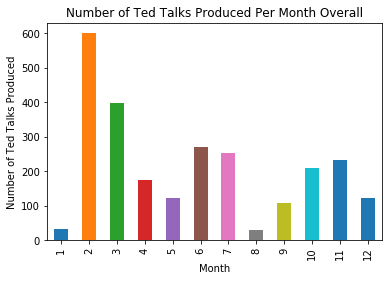

In [137]:
#Step 3: Exploratory Data Analysis & Data Visualization
#first we will plot a bar graph for the number ted talks done for each month over all ted talks
#we use a groupby function to group the dataframe by month on film date
ted_df.groupby(ted_df["film_date"].dt.month)['film_date'].count().plot(kind="bar")
#Edit labels 
plt.ylabel('Number of Ted Talks Produced')
plt.xlabel('Month')
plt.title('Number of Ted Talks Produced Per Month Overall')

Text(0.5,1,'Number of Ted Talks Produced Per Year Overall')

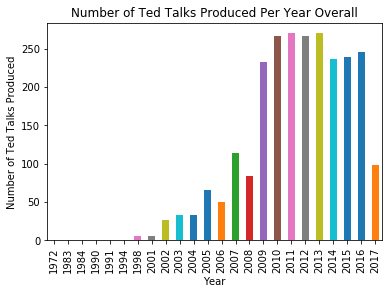

In [139]:
#now we will plot a bar graph for the number ted talks done for each year over all ted talks
#we use a groupby function to group the dataframe by year on film date
ted_df.groupby(ted_df["film_date"].dt.year)['film_date'].count().plot(kind="bar")
#Edit labels 
plt.ylabel('Number of Ted Talks Produced')
plt.xlabel('Year')
plt.title('Number of Ted Talks Produced Per Year Overall')

In [ ]:
#Step 4: Analysis, Hypothesis Testing, and Machine Learning 
#we want to be able to predict the amount of views that a ted talk will have based on the rating counts of the buzzwords
#that we selected (inspiring, funny, informative, fascinating)

Text(0.5,1,'Number of Views Versus Languages Available')

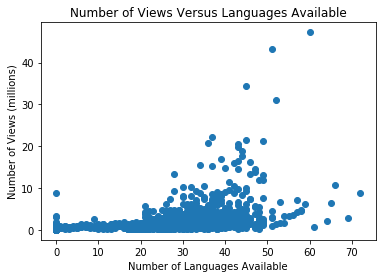

In [166]:
#now we will plot the amount of languages the talk is available in vs the amount of total views
plt.scatter(ted_df['languages'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Number of Languages Available')
plt.title('Number of Views Versus Languages Available')

Text(0.5,1,'Number of Views Versus Inspiration Rating Count')

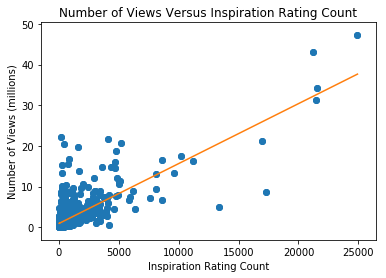

In [186]:
#Now, lets look at the simple relationships between the buzzwords we selected and views, which we will examine further
#in the machine learning portion
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['insp_rating'],ted_df['views']/1000000)
line = slope*ted_df['insp_rating']+intercept
plt.plot(ted_df['insp_rating'],ted_df['views']/1000000,'o', ted_df['insp_rating'], line)
plt.scatter(ted_df['insp_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Inspiration Rating Count')
plt.title('Number of Views Versus Inspiration Rating Count')

Text(0.5,1,'Number of Views Versus Funny Rating Count')

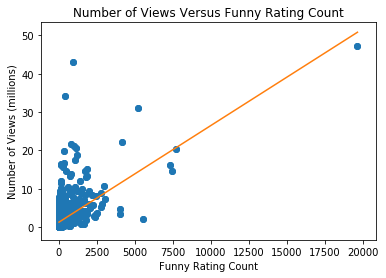

In [185]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['fun_rating'],ted_df['views']/1000000)
line = slope*ted_df['fun_rating']+intercept
plt.plot(ted_df['fun_rating'],ted_df['views']/1000000,'o', ted_df['fun_rating'], line)
plt.scatter(ted_df['fun_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Funny Rating Count')
plt.title('Number of Views Versus Funny Rating Count')

Text(0.5,1,'Number of Views Versus Informative Rating Count')

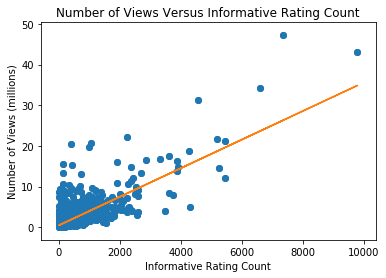

In [184]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['inf_rating'],ted_df['views']/1000000)
line = slope*ted_df['inf_rating']+intercept
plt.plot(ted_df['inf_rating'],ted_df['views']/1000000,'o', ted_df['inf_rating'], line)
plt.scatter(ted_df['inf_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Informative Rating Count')
plt.title('Number of Views Versus Informative Rating Count')

Text(0.5,1,'Number of Views Versus Fascinating Rating Count')

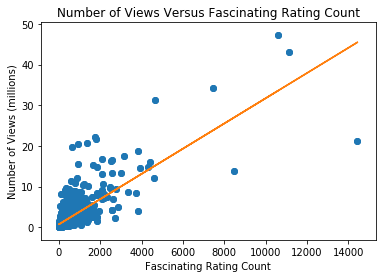

In [183]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['fasc_rating'],ted_df['views']/1000000)
line = slope*ted_df['fasc_rating']+intercept
plt.plot(ted_df['fasc_rating'],ted_df['views']/1000000,'o', ted_df['fasc_rating'], line)
plt.scatter(ted_df['fasc_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Fascinating Rating Count')
plt.title('Number of Views Versus Fascinating Rating Count')

In [174]:
"""
Markdown cell explaining strong linear relationship
"""

'\nMarkdown cell explaining strong linear relationship\n'

In [233]:
#Train a machine learning model to estimate the amount of views based on buzzword counts
train, test = train_test_split(ted_df, test_size=0.2)
clf = sklearn.linear_model.LinearRegression()
clf.fit(train[['insp_rating', 'fun_rating', 'inf_rating', 'fasc_rating']], train['views'])
predicted = clf.predict(test[['insp_rating', 'fun_rating', 'inf_rating', 'fasc_rating']])

Text(0.5,1,'Predicted of Views Versus Total Rating Score')

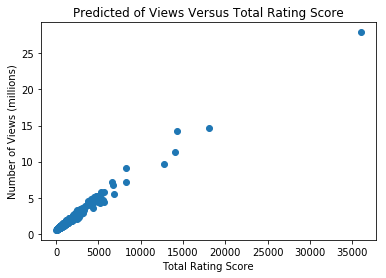

In [236]:
plt.scatter(test['insp_rating']+test['fun_rating']+test['inf_rating']+test['fasc_rating'], predicted/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Total Rating Score')
plt.title('Predicted of Views Versus Total Rating Score')